In [662]:
# Importing all the required libaries
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


# load make_blobs to simulate data
from sklearn.datasets import make_blobs

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

#importing the tree's
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [663]:
# import the dataset
df_test = pd.read_csv(r'E:\A.I course\Club Mahindra dataset\test.csv')
df_train = pd.read_csv(r'E:\A.I course\Club Mahindra dataset\train.csv')

In [664]:
df_test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [665]:
df_train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [666]:
df_train.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


In [667]:
df_test.shape

(146765, 23)

In [668]:
df_test.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code
count,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146730.000000,144505.000000,146765.000000,146765.000000,146765.000000
mean,1.902068,2.204483,3.275897,0.362287,209.179852,1.774101,2.196675,2.888754,3.730372,2.681088,7.254206,4.750560,3.188410,1.123354
std,0.914653,0.817804,1.783842,0.758218,862.926844,0.753281,1.544679,0.804043,2.482388,0.882366,4.755982,3.101036,1.163872,0.328844
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000
max,3.000000,7.000000,32.000000,10.000000,4995.000000,3.000000,7.000000,6.000000,80.000000,4.000000,38.000000,13.000000,21.000000,2.000000


In [669]:
df_train.shape

(341424, 24)

In [670]:
new_dataset = pd.concat([df_train,df_test], sort = True)

In [671]:
new_dataset.head()

,amount_spent_per_room_night_scaled,booking_date,booking_type_code,channel_code,checkin_date,checkout_date,cluster_code,main_product_code,member_age_buckets,memberid,...,reservationstatusid_code,resort_id,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax
0,7.706428,05/04/18,1,3,05/04/18,06/04/18,F,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,3,3,3,1,2.0,7.0,3,3
1,6.662563,23/01/15,1,1,11/04/15,16/04/15,F,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,3,3,4,5,2.0,7.0,5,2
2,7.871602,28/01/15,1,1,01/02/15,05/02/15,E,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,5,4,4,2.0,7.0,1,2
3,5.344943,02/05/15,1,1,11/06/15,16/06/15,D,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,3,5,2.0,7.0,2,2
4,7.059346,02/09/15,1,1,14/12/15,19/12/15,D,1,F,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,...,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,4,5,2.0,7.0,2,2


In [672]:
new_dataset.shape

(488189, 24)

In [673]:
new_dataset.isnull().any()

amount_spent_per_room_night_scaled     True
booking_date                          False
booking_type_code                     False
channel_code                          False
checkin_date                          False
checkout_date                         False
cluster_code                          False
main_product_code                     False
member_age_buckets                    False
memberid                              False
numberofadults                        False
numberofchildren                      False
persontravellingid                    False
reservation_id                        False
reservationstatusid_code              False
resort_id                             False
resort_region_code                    False
resort_type_code                      False
room_type_booked_code                 False
roomnights                            False
season_holidayed_code                  True
state_code_residence                   True
state_code_resort               

In [674]:
# Replacing the missing values with the mean for Dataset
mean = new_dataset['amount_spent_per_room_night_scaled'].mean()
new_dataset['amount_spent_per_room_night_scaled'].fillna(mean, inplace=True)
new_dataset.isnull().sum()

amount_spent_per_room_night_scaled       0
booking_date                             0
booking_type_code                        0
channel_code                             0
checkin_date                             0
checkout_date                            0
cluster_code                             0
main_product_code                        0
member_age_buckets                       0
memberid                                 0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
reservation_id                           0
reservationstatusid_code                 0
resort_id                                0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  149
state_code_residence                  7024
state_code_resort                        0
total_pax  

In [675]:
new_dataset.columns

Index(['amount_spent_per_room_night_scaled', 'booking_date',
       'booking_type_code', 'channel_code', 'checkin_date', 'checkout_date',
       'cluster_code', 'main_product_code', 'member_age_buckets', 'memberid',
       'numberofadults', 'numberofchildren', 'persontravellingid',
       'reservation_id', 'reservationstatusid_code', 'resort_id',
       'resort_region_code', 'resort_type_code', 'room_type_booked_code',
       'roomnights', 'season_holidayed_code', 'state_code_residence',
       'state_code_resort', 'total_pax'],
      dtype='object')

In [676]:
del_col_train = ['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
                 'season_holidayed_code','memberid','booking_type_code','memberid','resort_id',
                 'reservationstatusid_code','state_code_residence','room_type_booked_code','member_age_buckets'
                ,'resort_type_code','main_product_code','resort_region_code','cluster_code','state_code_resort'
                  ,'numberofchildren']

In [677]:
new_dataset = new_dataset.drop(labels = del_col_train,axis=1)
new_dataset= new_dataset.reset_index(drop=True)
print("This is the shape of the train dataset currenty: ", new_dataset.shape)

This is the shape of the train dataset currenty:  (488189, 6)


In [678]:
new_dataset.head()

,amount_spent_per_room_night_scaled,numberofadults,persontravellingid,reservation_id,roomnights,total_pax
0,7.706428,2,46,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,1,3
1,6.662563,2,46,03930f033646d073462b35d411616323597715ac4fc398...,5,2
2,7.871602,2,47,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,4,2
3,5.344943,2,46,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,5,2
4,7.059346,2,46,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,5,2


In [679]:
# Time to convert the categorical data into numerical data, using LabelEncoder and OneHotencoder

In [680]:
from sklearn.compose import ColumnTransformer 
Le = LabelEncoder()

In [681]:
new_feature = new_dataset.loc[:,['reservation_id']]
new_feature.head()

,reservation_id
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...
1,03930f033646d073462b35d411616323597715ac4fc398...
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...


In [682]:
dfLe = new_dataset
dfLe.reservation_id = Le.fit_transform(dfLe.reservation_id)
dfLe.head()

,amount_spent_per_room_night_scaled,numberofadults,persontravellingid,reservation_id,roomnights,total_pax
0,7.706428,2,46,13950,1,3
1,6.662563,2,46,6719,5,2
2,7.871602,2,47,398658,4,2
3,5.344943,2,46,395979,5,2
4,7.059346,2,46,281200,5,2


In [683]:
new_train = dfLe

In [684]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
print(ohe.fit_transform(new_dataset))

  (0, 110768)	1.0
  (0, 278086)	1.0
  (0, 278114)	1.0
  (0, 292069)	1.0
  (0, 766310)	1.0
  (0, 766359)	1.0
  (1, 32562)	1.0
  (1, 278086)	1.0
  (1, 278114)	1.0
  (1, 284838)	1.0
  (1, 766314)	1.0
  (1, 766358)	1.0
  (2, 131129)	1.0
  (2, 278086)	1.0
  (2, 278115)	1.0
  (2, 676777)	1.0
  (2, 766313)	1.0
  (2, 766358)	1.0
  (3, 6666)	1.0
  (3, 278086)	1.0
  (3, 278114)	1.0
  (3, 674098)	1.0
  (3, 766314)	1.0
  (3, 766358)	1.0
  (4, 52562)	1.0
  :	:
  (488184, 766358)	1.0
  (488185, 112443)	1.0
  (488185, 278087)	1.0
  (488185, 278113)	1.0
  (488185, 591263)	1.0
  (488185, 766310)	1.0
  (488185, 766360)	1.0
  (488186, 112443)	1.0
  (488186, 278089)	1.0
  (488186, 278113)	1.0
  (488186, 731147)	1.0
  (488186, 766313)	1.0
  (488186, 766359)	1.0
  (488187, 112443)	1.0
  (488187, 278086)	1.0
  (488187, 278118)	1.0
  (488187, 385195)	1.0
  (488187, 766311)	1.0
  (488187, 766360)	1.0
  (488188, 112443)	1.0
  (488188, 278086)	1.0
  (488188, 278115)	1.0
  (488188, 424404)	1.0
  (488188, 766310)	

In [685]:
# Visual representation of the data

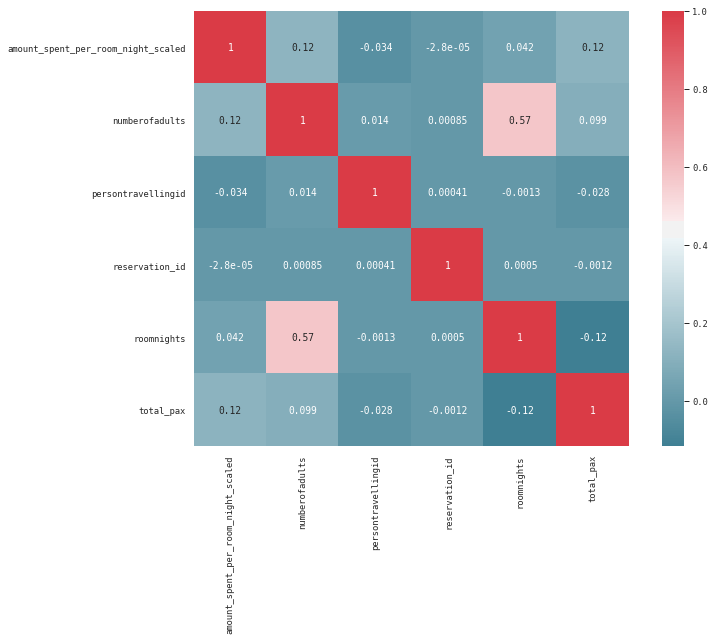

In [686]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
new_dataset_corr_matrix = new_dataset.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(new_dataset_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

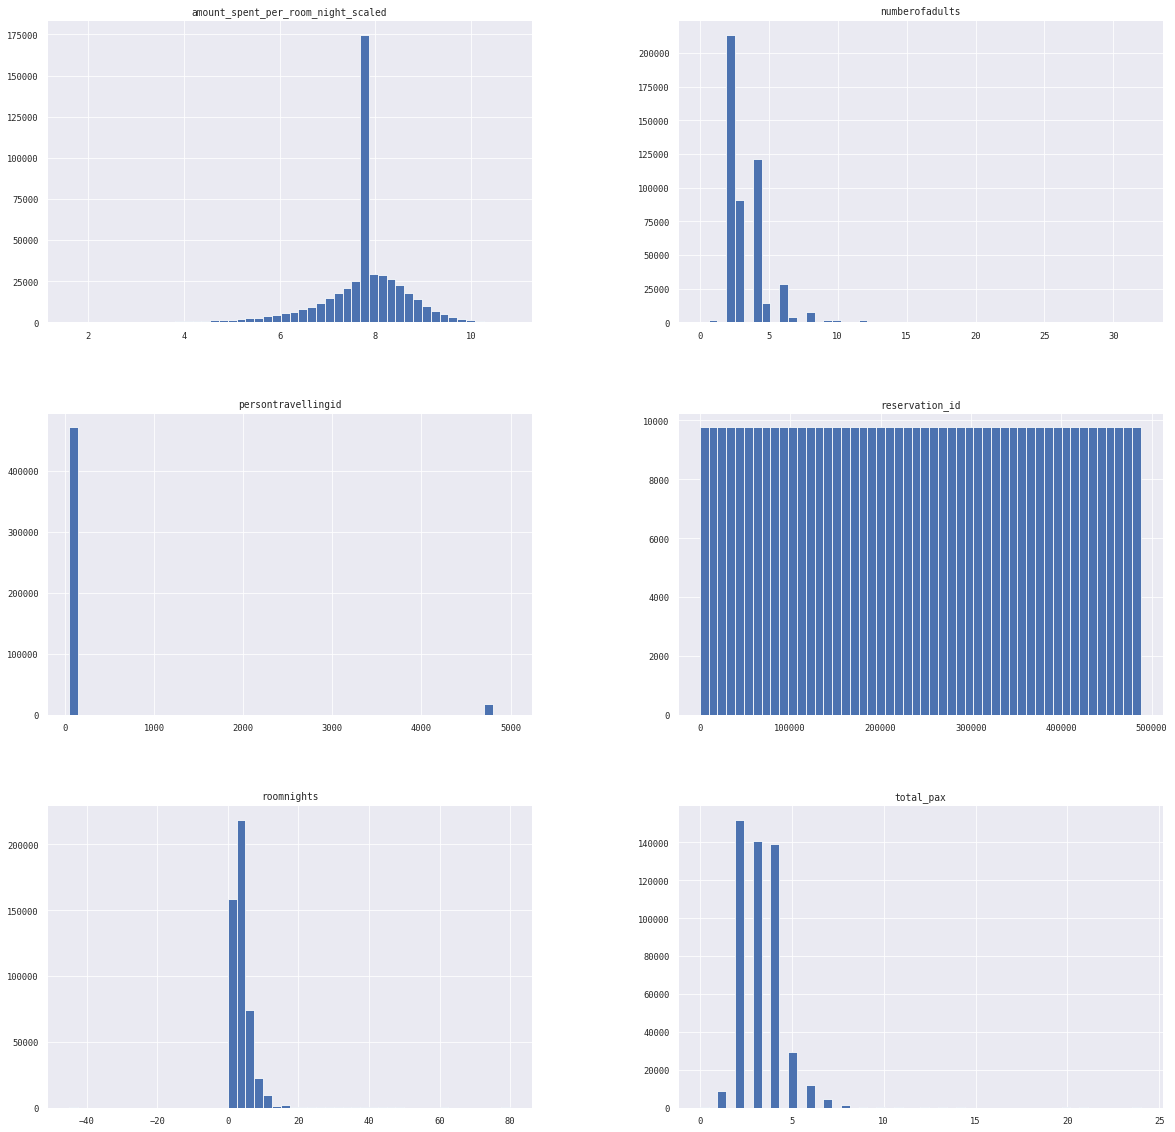

In [687]:
new_dataset.hist(bins=50, figsize=(20,20))
plt.show()

In [688]:
X = new_dataset
y = new_dataset.iloc[:,0:1]

In [689]:
# Need to scale the datasets

In [690]:
y.head()

,amount_spent_per_room_night_scaled
0,7.706428
1,6.662563
2,7.871602
3,5.344943
4,7.059346


In [691]:
y.astype(int).tail()

,amount_spent_per_room_night_scaled
488184,7
488185,7
488186,7
488187,7
488188,7


In [692]:
X = new_dataset.iloc[:,1:14]
y = round(new_dataset.iloc[:,0:1])

In [693]:
y.head()

,amount_spent_per_room_night_scaled
0,8.0
1,7.0
2,8.0
3,5.0
4,7.0


In [694]:
# Perform a train test split

In [695]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.33, random_state =123)

In [696]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((161103, 5), (327086, 5), (161103, 1), (327086, 1))

In [697]:
# Feature selection with Select KBest
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [698]:
# Feature selection with Select Kbest
selected_features_df = pd.DataFrame({'Feature':list(X_train),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
2,reservation_id,912630.250191
1,persontravellingid,606087.903726
0,numberofadults,6774.273323
3,roomnights,3386.901851
4,total_pax,1239.104299


In [699]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

# Linear Regression

In [700]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [701]:
y_pred=linreg.predict(X_test)
y_pred

array([[7.71095483],
       [7.84270009],
       [8.11816751],
       ...,
       [7.72266749],
       [7.72859863],
       [7.94492293]])

In [702]:
from sklearn.metrics import mean_squared_error


In [703]:
np.sqrt(mean_squared_error(y_test, y_pred))*100

94.04153990714221

In [704]:
# Using R2 score to evaluate the goodness of the fit or model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

0.02602509573252698

In [705]:
X_train.size, y_train.size, X_test.size, y_test.size, y_pred.size

(805515, 161103, 1635430, 327086, 327086)

In [706]:
# Use the features derived from select k best

In [707]:
linreg = LinearRegression()
linreg.fit(X_train_chi,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [708]:
y_pred_chi=linreg.predict(X_test_chi)
y_pred_chi

array([[7.71095483],
       [7.84270009],
       [8.11816751],
       ...,
       [7.72266749],
       [7.72859863],
       [7.94492293]])

In [709]:
np.sqrt(mean_squared_error(y_test, y_pred_chi))*100

94.04153990714221

In [710]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_chi) 

0.02602509573252698

In [711]:
linreg.intercept_

array([7.36246211])

In [712]:
linreg.coef_

array([[ 6.58936609e-02, -3.36983975e-05, -3.52511451e-10,
        -5.90927766e-03,  8.06401094e-02]])

In [713]:
# There is a slight increase in the accuracy

# Lets try using Random Forest Regressor

In [714]:
clf_rf = RandomForestRegressor(n_estimators = 100,random_state = 42)

In [715]:
y_train = np.ravel(y_train)

In [716]:
clf_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [717]:
y_pred_2 = clf_rf.predict(X_test)
y_pred_2

array([7.99, 7.61, 8.3 , ..., 7.67, 7.93, 7.47])

In [718]:
np.sqrt(mean_squared_error(y_test, y_pred_2))*100

105.78401841864635

In [719]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_2) 

-0.23239073308687508

In [720]:
# Use the features derived from select k best

In [721]:
clf_rf.fit(X_train_chi,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [722]:
y_pred_chi_rf=clf_rf.predict(X_test_chi)
y_pred_chi_rf

array([7.99, 7.61, 8.3 , ..., 7.67, 7.93, 7.47])

In [723]:
np.sqrt(mean_squared_error(y_test, y_pred_chi))*100

94.04153990714221

In [724]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_chi) 

0.02602509573252698

In [725]:
# We can see that the Random forest has a better RMSE that Random forest with chi matrix

# Using XGBoost Regressor

In [726]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [727]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [728]:
pred_xg = xg_reg.predict(X_test)
pred_xg

array([7.6361847, 7.6361847, 7.6361847, ..., 7.4205947, 7.6361847,
       7.6361847], dtype=float32)

In [729]:
np.sqrt(mean_squared_error(y_test, pred_xg))*100

96.58980897171965

In [730]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_xg) 

-0.02747418039206595

In [731]:
# Use the features derived from select k best

In [732]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 9)

In [733]:
xg_reg.fit(X_train_chi,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=9, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [734]:
y_pred_chi_xg=xg_reg.predict(X_test_chi)
y_pred_chi_xg

array([7.5417933, 7.5417933, 7.5417933, ..., 7.3723426, 7.5417933,
       7.5417933], dtype=float32)

In [735]:
np.sqrt(mean_squared_error(y_test, y_pred_chi_xg))*100

98.8974099004571

In [736]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_chi_xg) 

-0.07715484260454653

# Converting dataframe into CSV

In [737]:
df_test.shape

(146765, 23)

In [738]:
final_pred = y_pred.astype(int)


In [739]:
final_pred

array([[7],
       [7],
       [8],
       ...,
       [7],
       [7],
       [7]])

In [740]:
final_pred_1 =  np.resize(final_pred,146765)

In [741]:
final_pred_1.shape

(146765,)

In [742]:
reservation_id = df_test['reservation_id']
reservation_id.head()

0    7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...
1    fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...
2    540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...
3    09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...
4    f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...
Name: reservation_id, dtype: object

In [743]:
df_final=pd.Series(final_pred_1)
df_final.head()

0    7
1    7
2    8
3    7
4    7
dtype: int32

In [744]:
df_final.head()

0    7
1    7
2    8
3    7
4    7
dtype: int32

In [745]:
submission = pd.concat([reservation_id , df_final], axis = 1)

In [746]:
submission.head()

,reservation_id,0
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,8
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7


In [747]:
submission.rename({0:'amount_spent_per_room_night_scaled'}, axis = 1).head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,8
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7


In [749]:
#submission.to_csv(r'submission.csv',index = False)